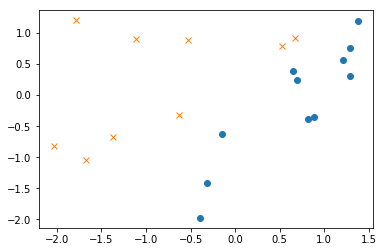

In [15]:
import numpy as np
import matplotlib.pyplot as plt

#学習データを読み込む
train = np.loadtxt('verification2.csv', delimiter =',', skiprows=1)
train_x = train[:,0:2]
train_y = train[:,2]

theta = np.random.rand(3)

#標準化
mu = train_x.mean()
sigma = train_x.std()
def standardize(x):
    return (x -mu) / sigma

train_z = standardize(train_x)

#x0を加える
def to_matrix(x):
    x0 = np.ones([x.shape[0],1])
    return np.hstack([x0,x])

X = to_matrix(train_z)

plt.plot(train_z[train_y ==1,0],train_z[train_y ==1,1],'o')
plt.plot(train_z[train_y ==0,0],train_z[train_y ==0,1],'x')
plt.show()

* シグモイド関数
$$
    f_θ({x}) = 1/{(1+exp(-θ^Tx))}
$$

In [16]:
#シグモイド関数
def f(x):
    return 1 / (1+np.exp(-np.dot(x,theta)))

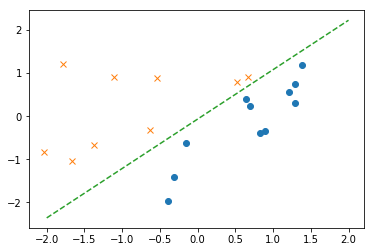

In [20]:
#学習率
ETA = 1e-3
#繰り返し回数
epoch = 5000

count =0

#学習を繰り返す
for _ in range(epoch):
    theta = theta - ETA*np.dot(f(X)-train_y,X)
#     count +=1
#     log = '{}回目 : theta0 = {:.3f},theta1 = {:.3f},theta2 = {:.3f}'
#     print(log.format(count,theta[0],theta[1],theta[2]))

x0 = np.linspace(-2,2,100)
plt.plot(train_z[train_y ==1,0],train_z[train_y ==1,1],'o')
plt.plot(train_z[train_y ==0,0],train_z[train_y ==0,1],'x')
plt.plot(x0,-(theta[0]+theta[1]*x0)/theta[2],linestyle='dashed')
plt.show()

In [23]:
f(to_matrix(standardize([[200,100],[100,200]])))

array([0.96834074, 0.00178639])

In [24]:
def classify(x):
    return (f(x) >=0.5).astype(np.int)

In [26]:
classify(to_matrix(standardize([[200,100],[100,200]])))

array([1, 0])